# **Análise exploratória dos Dados do Airbnb de Nova York - NY**
 <img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

*Por Guilherme Pithon*


---


Se alguém te pedisse para imaginar como seria a maior rede hoteleira do mundo, você certamente imaginaria em uma rede com milhares de hotéis e funcionários, certo?

Bem, esse é o pensamento normal de qualquer pessoa, mas foi o caminho oposto que o Airbnb, maior empresa hoteleira do mundo, fez. A plataforma criada em 2008 por três estudantes de Design dos Estados Unidos não possui nenhum hotel própiro e tem como objetivo conectar pessoas quem disponibilizem ou queiram alugar quaisquer tipos acomodações ao redor do mundo.

Atualmente o serviço já acomodou mais **de 300 milhões de pessoas em mais de 30 mil cidades e 192 países**, desbancando qualquer rede hoteleira.  

A empresa também disponibiliza gratuitamente em seu site, dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science. 

Neste notebook, iremos analisar de forma exploratória os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.


## 01. Obtenção dos dados
Todos dados utilizados nesse notebook são oficiais e foram extraídos do portal do Inside Airbnb. Logo nesta etapa apenas importamos as bibliotecas necessárias e o arquivo de análise. 

In [ ]:
## Importação dos pacotes necessários
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

%matplotlib inline 

In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/visualisations/listings.csv")

## 02. Análise Inicial dos Dados

Antes de iniciarmos nossa análise, é interessante definir as variáveis que iremos trabalhar ao decorrer deste artigo. Por isso, segue abaixo nosso dicionário de variáveis

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Outro ponto interessante, é conhecer a "cara" do nosso dataset, verificando as cinco primeiras entradas dele.

In [ ]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0


Tendo uma ideia inicial de como está estruturado nosso Dataset, vamos entender seu dimensionamento, analisando a quantidade de entradas, seus tipos e bem como nossas variáveis

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 37012
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## 03. Tratamento dos dados

A qualidade de um dataset está relacionado ligado com a qualidade das informações que estão contidas nele. 

Logo, para tratar nosso dados, vamos observar dois pontos importantes:



*   **Valores Ausentes** 
*   **Valores Outliers**




### 3.1 Calculando a pocentagem de valores ausentes



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.257295
last_review                       0.257295
host_name                         0.000486
name                              0.000351
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Analisando o resultado retornado, observamos que estamos trabalhando com um ótimo dataset, uma vez que que a porcentaagem de valores ausentes das variáveis **"reviews_per_month"** e **"last_review"** é baixa (25%), enquanto as demais não apresentam ou apresentam uma porcentagem insignificativa de valores ausentes

###3.2 Identificação de Outliers

Uma forma interessante para identificar outliers é por meio de histomagramas. Através deles, é possível ter uma visão geral de como estão distribuidos os dados

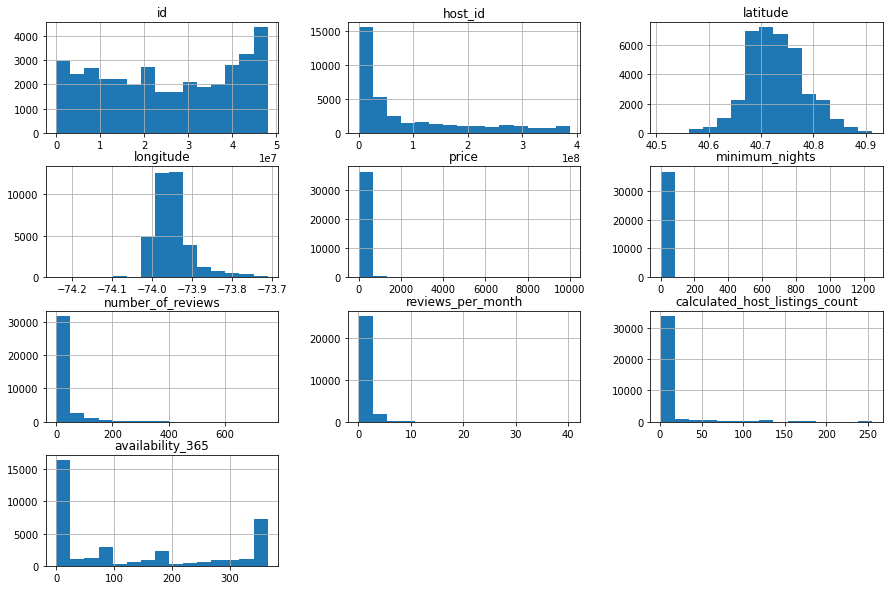

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

De uma forma geral, é possível identifciar alguns pequenos indícios outliers em nosso Dataset, uma vez que sua distribuição aparenta ser bem uniforme.





Uma forma de verificar mais a fundo essa informação é através de um resumo estatístico das nossas principais variáveis.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()
    


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,37012.000000,37012.000000,37012.000000,27489.000000,37012.000000,37012.000000
mean,142.842240,23.323679,22.904112,0.867197,9.405220,130.282800
std,275.740987,26.441255,47.864720,1.320503,31.613257,146.635272
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,99.000000,30.000000,4.000000,0.360000,1.000000,66.000000
75%,151.000000,30.000000,20.000000,1.120000,2.000000,292.000000
max,10000.000000,1250.000000,753.000000,40.310000,255.000000,365.000000


Analisando nosso resumo estatístico conseguimos levantar duas hipóteses em relação aos nossos outliers



*   A variável **"minimum_nights"** apresenta um valor acima dos 365 dias no ano, mesmo possuindo 75% dos valores abaixo de 30
*   A variável **"price"** possui 75% do seu valor abaixo de 151 porém seu valor máximo é 10.000

Dessa forma, vamos analisar o impacto desses valores em nosso dataset






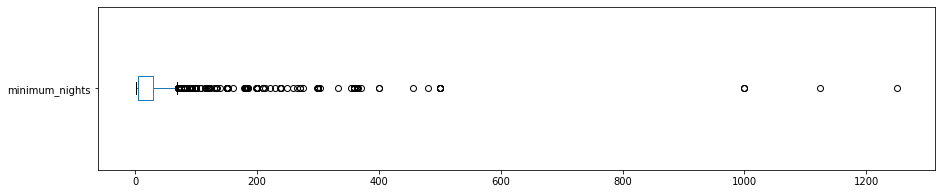

minimum_nights: valores acima de 30:
1170 entradas
3.1611%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

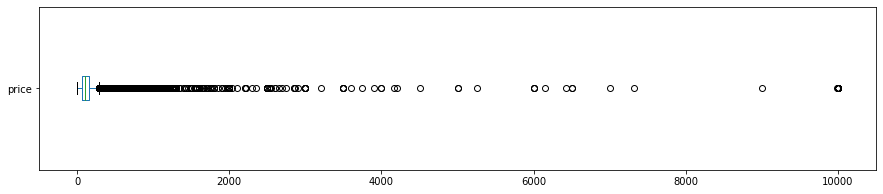

price: valores acima de 30:
191 entradas
0.5160%


In [ ]:
# minimum_nights
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 151 dias para minimum_nights
print("price: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 151 ])))
print("{:.4f}%".format((len(df[df.minimum_nights > 151]) / df.shape[0])*100))

### 3.3 Limpeza dos Dados


Já que identificamos outliers nas variáveis **"price"** e **"minimum_nights"**, vamos agora limpar o Dataframe e plotar novamente nosso histograma

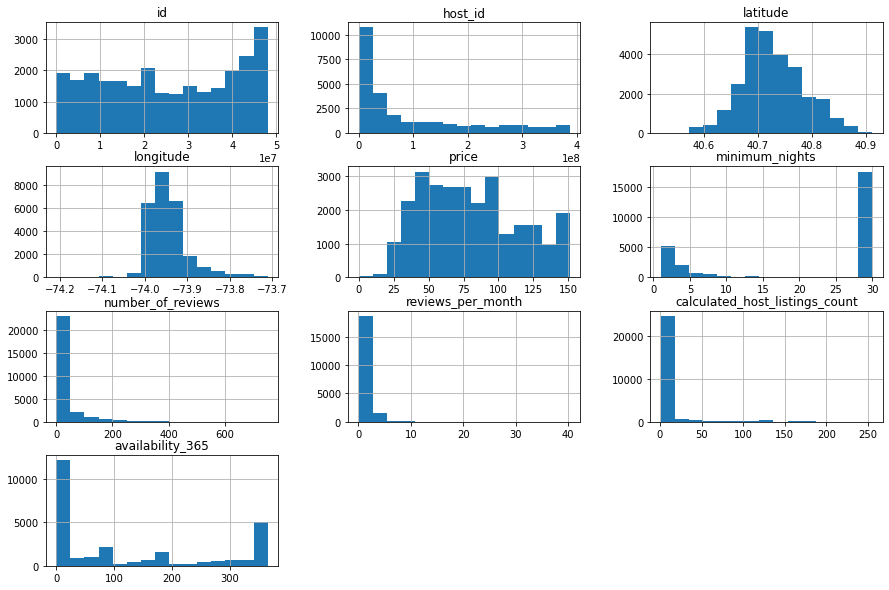

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 151].index, axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

##04. Análises dos Dados

Esta etapa será dedicada para realização do teste de correlação entre as variáveis, bem como para retirar alguns insights dos dados.

###4.1 Teste de Correlação

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Desta forma faremos:

*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn




In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.006318,0.020434,-0.024666,-0.144896,-0.017074
minimum_nights,0.006318,1.000000,-0.254661,-0.398555,0.128174,-0.145128
number_of_reviews,0.020434,-0.254661,1.000000,0.684089,-0.107917,0.158367
reviews_per_month,-0.024666,-0.398555,0.684089,1.000000,-0.050261,0.181460
calculated_host_listings_count,-0.144896,0.128174,-0.107917,-0.050261,1.000000,0.186831
availability_365,-0.017074,-0.145128,0.158367,0.181460,0.186831,1.000000


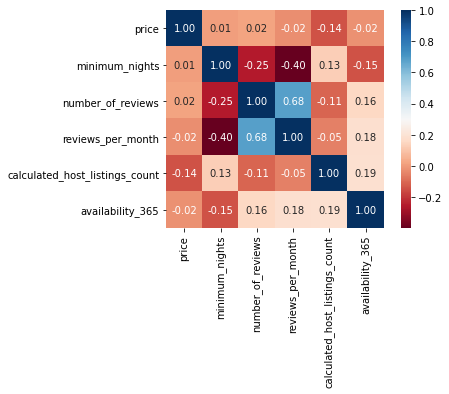

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Analisando nossos resultados, concluimos que não há nenhuma correlação significativa.

###4.2 Outras análises

Uma análise interessante é observar qual o tipo de imóvel mais estão disponíveis no AirBnb e sua porcentagem em relação ao geral

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       15339
Entire home/apt    10854
Shared room          610
Hotel room           149
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.569123
Entire home/apt    0.402716
Shared room        0.022633
Hotel room         0.005528
Name: room_type, dtype: float64

A contagem dos tipos de variável além de nós dar insights interessantes, também nos auxilia na interpretação das próximas análises.

Quando fazemos o cálculo para saber os cinco bairros com maiores médias de preços temos o seguinte resultado  

In [ ]:
  df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Prince's Bay    145.000000
Belle Harbor    131.000000
Howland Hook    125.000000
Mount Eden      123.333333
Oakwood         118.400000
Name: price, dtype: float64

Porém quando fazemos a contagem dos dados vemos que a amostra de cada bairro é relativamente pequena, e por isso o valor da média pode estar um pouco mascarado

In [ ]:
print("Prince's Bay = {}".format(df_clean.neighbourhood.value_counts()["Prince's Bay"]))
print("Belle Harbor = {}".format(df_clean.neighbourhood.value_counts()["Belle Harbor"]))
print("Howland Hook = {}".format(df_clean.neighbourhood.value_counts()["Howland Hook"]))
print("Mount Eden = {}".format(df_clean.neighbourhood.value_counts()["Mount Eden"]))
print("Oakwood = {}".format(df_clean.neighbourhood.value_counts()["Oakwood"]))

Prince's Bay = 1
Belle Harbor = 1
Howland Hook = 1
Mount Eden = 3
Oakwood = 5


In [ ]:
df_clean.neighbourhood.value_counts().sort_values(ascending=False)[:10]

Bedford-Stuyvesant    2281
Williamsburg          1968
Harlem                1598
Bushwick              1495
Crown Heights          925
Hell's Kitchen         887
Upper East Side        874
Upper West Side        828
East Village           793
Midtown                760
Name: neighbourhood, dtype: int64

Ao analsiar a contagem dos demais dados, vemos que nossa amostra inicial que mostra a maior média de preços é possui poucos dados, e que por isso, podem gerar um valor "tendencioso"

Uma saída para uma análise visual é através do gráticio abaixo, em que através da latitude e longetidude, retorna um gráfico de calor com os maiores preços.

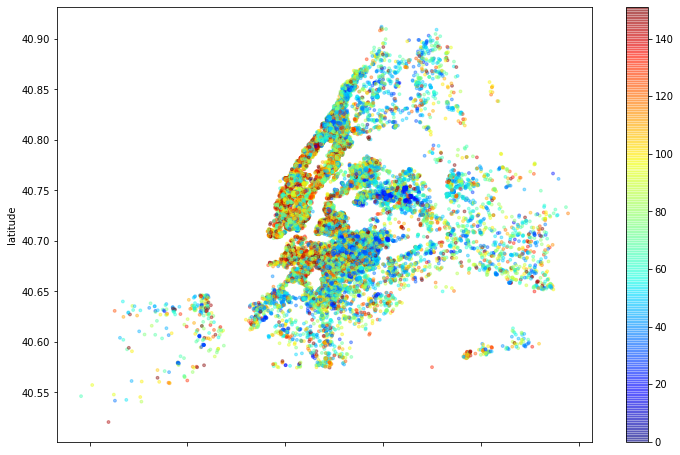

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

##05. Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
